## POLSCI 3 Summer 2022

## Week 6 Lecture Notebook 2: Distributions and Statistical Inference

# Distributions
We have covered how to calculate key statistics for a variable. Most often, these variables represent summary values of distributions, or sets of values. For example, `inc_vote` from the previous lecture notebook contained a distribution of values, the incumbent presidential vote. We can use R to generate different kinds of distributions. 

To start, let's consider a probability distribution of a flip of a coin. Below, we simulate flipping the coin 
once using the <code>sample</code> function. Note that there are two options for outcomes of a coin flip: 
a 0 signifying tails or a 1 signifying heads. <code>sample</code> randomly chooses one or the other. 

In [1]:
coin_choices = c(0, 1)                                    # 0 for tails and 1 for heads
coin_flip = sample(coin_choices, replace = TRUE, size=1)  # Take 1 draw from `coin_choices`
coin_flip                                                 # Display the results of the flips

[1] 0

Usually we want not just one flip of a coin but a whole distribution of flips. To generate that we change the <code>size</code> option in the <code>sample</code> function. Let's do 30 coin flips to create a distribution of flips. 

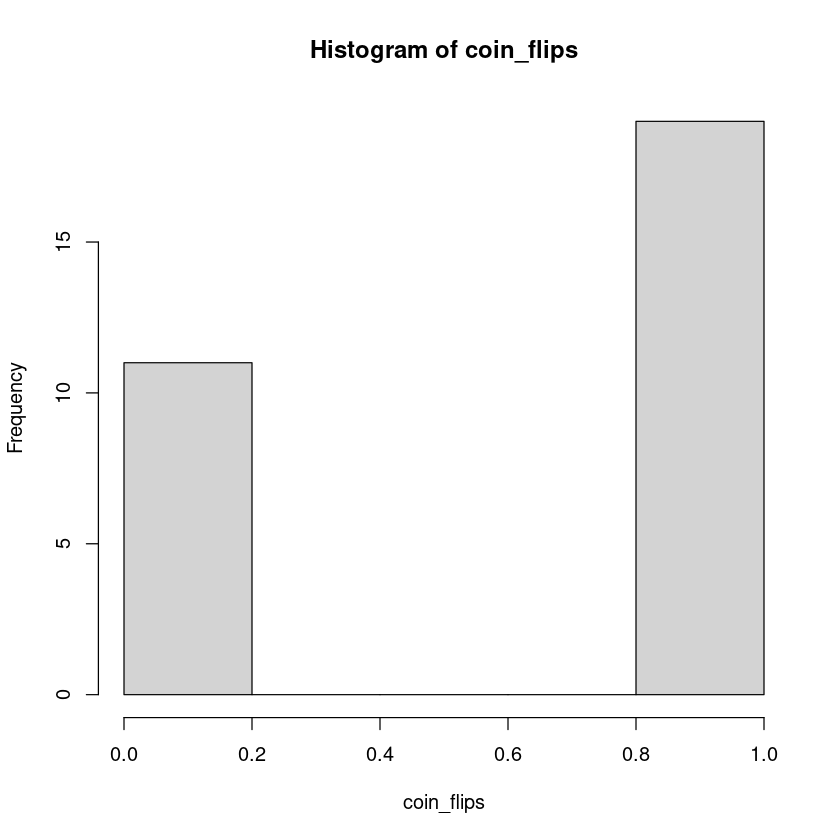

In [2]:
coin_choices = c(0, 1)                                    # 0 for tails and 1 for heads
coin_flips = sample(coin_choices, replace = TRUE, size=30)  # Take 30 draw from `coin_choices`
hist(coin_flips)                                                 # Display the results of the flips

Now let's simulate the rolling of 30 dice (or 1 die 30 times). Note the similarity in the code below with the code for coin flips above.

[1] 3.266667

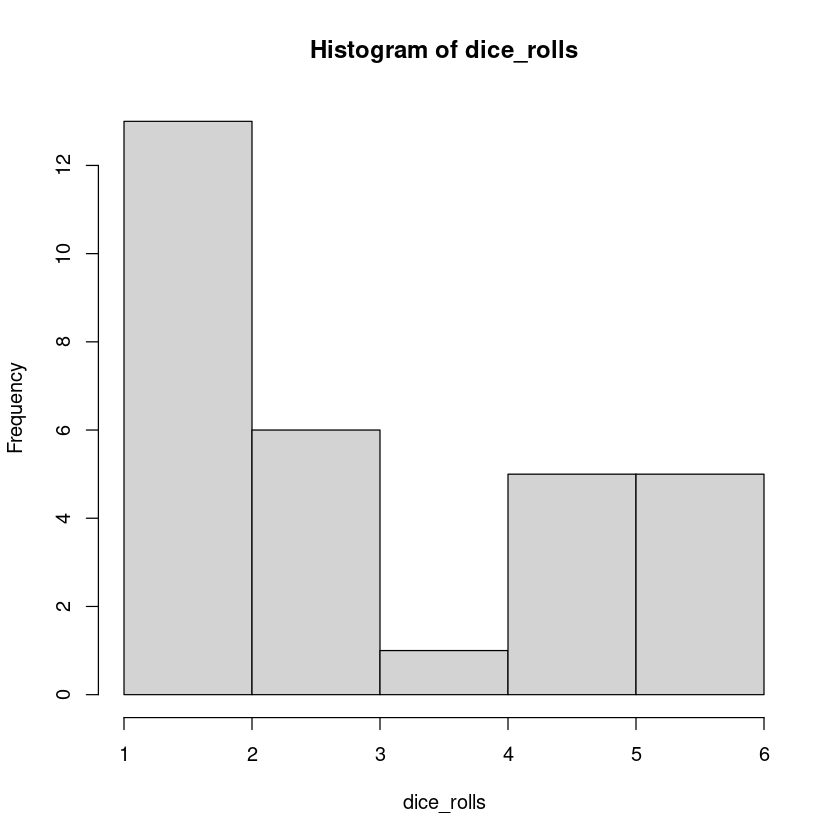

In [3]:
die_choices = c(1,2,3,4,5,6)                              # These are the numbers on the die faces
dice_rolls = sample(die_choices, replace = TRUE, size=30) # Take a draw of 30
hist(dice_rolls)                                          # Display histogram of dice rolls
mean(dice_rolls)                                          # Display mean of dice rolls

Some distributions are so common that R has a built-in command for them. One of these is the Normal distribution. Recall from lecture that the Normal distribution is symmetrical: its mean, median, and mode are the same. It follows the 68-95-99 rule: 68% of the distribution lies within 1 standard deviation of the mean, 95% within 2 standard deviations, and 99% within 3 standard deviations.  Let's display a Normal distribution. 

[1] 0.02166483

[1] 1.022552

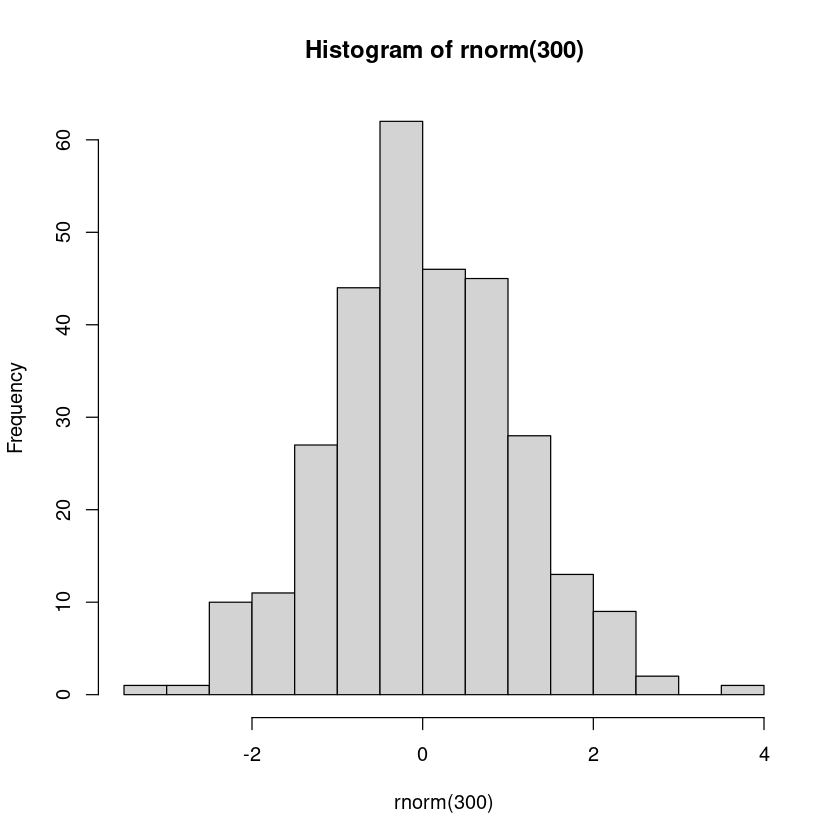

In [4]:
hist(rnorm(300))         # histogram of the normal distribution
mean(rnorm(300))         # mean of a normal distribution
sd(rnorm(300))           # standard deviation of a normal distribution

What does all this have to do with political science? A lot, actually. In political science we are often interested in the attitudes and behaviors of populations, for example the US population. What is the level of presidential approval in the US population? Support for abortion? Or foreign intervention? Collecting data about an entire population is expensive and may not even be feasible. What to do? 

### Central Limit Theorem

The *Central Limit Theorem* is a magical solution to the problem. It proves that we can learn some important characteristics of a population of values by examining the corresponding values from a *random sample* of the population. (Recall that for a sample to be random each member of the population must have an equal probability of being chosen for the sample.) For example, if we want to estimate the average level of presidential support in the US population we would take a random sample of the US population (typically 1-3000 people) and then compute the mean (and standard deviation) of presidential support for the sample. 

How does that work? How can we possibility learn about a population of hundreds of millions of people by examining a random sample of a few thousand? The Central Limit Theorem states that, virtually regardless of the distribution of the quantity of interest in the population, the distribution of sample *means* of the quantity of interest will resemble a Normal distribution for a sufficiently large sample size. Since the properties of a Normal distribution are known (as we saw above) we can make inferences about population values. 

A proof of the Central Limit Theorem is beyond the scope of the course. But we can illustrate how it works. To do so let's return to the dice rolls example: 

[1] 3.2

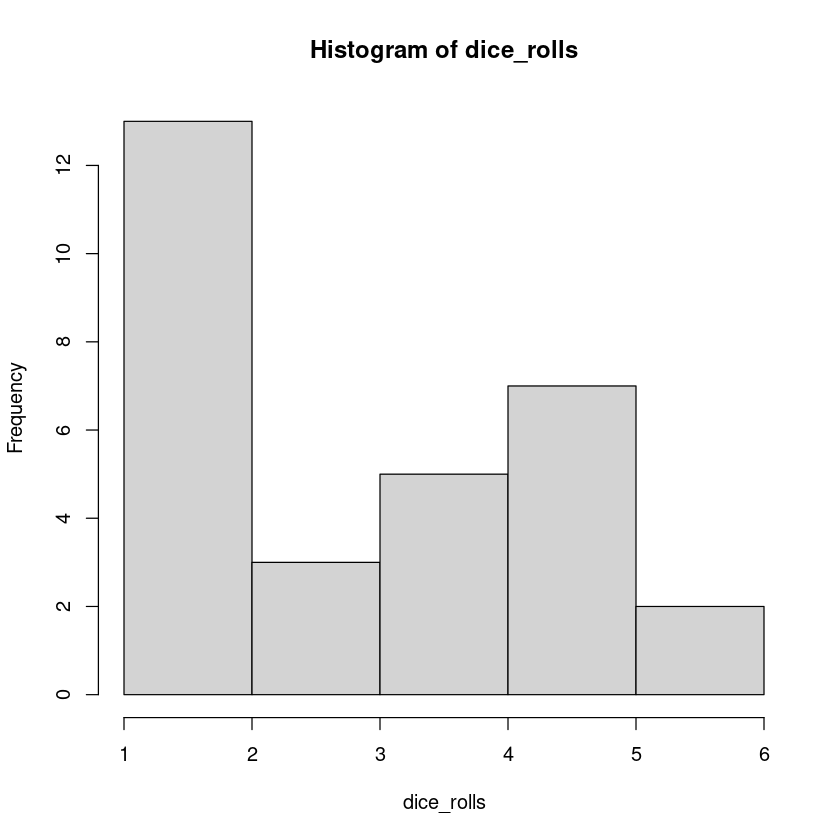

In [5]:
die_choices = c(1,2,3,4,5,6)                              # These are the numbers on the die faces
dice_rolls = sample(die_choices, replace = TRUE, size=30) # Take a draw of 30
hist(dice_rolls)                                          # Display histogram of dice rolls
mean(dice_rolls)                                          # Display mean of dice rolls

This code produces a mean value of a random roll of 30 fair dice. If we execute the above code again we are likely to get a different mean value because we will have a new sample. Note that the mean value is not necessarily always 3.5. Due to natural randomness sometimes it will be less than 3.5 and sometimes more than 3.5 (and rarely exactly 3.5). 

What we want to do now it take repeated samples. We could scroll up and run this code over and over a very large number of times, being sure to write down the mean value on the dice for each sample. But that would be inefficient. Instead we are going to let R do it for us. The following code does it. 
YOU DO NOT NEED TO UNDERSTAND EXACTLY HOW THIS CODE WORKS.

### [Link to interactive version of the cell below](http://127.0.0.1:3018/Central%20Limit%20Theorom%20dup.Rmd)

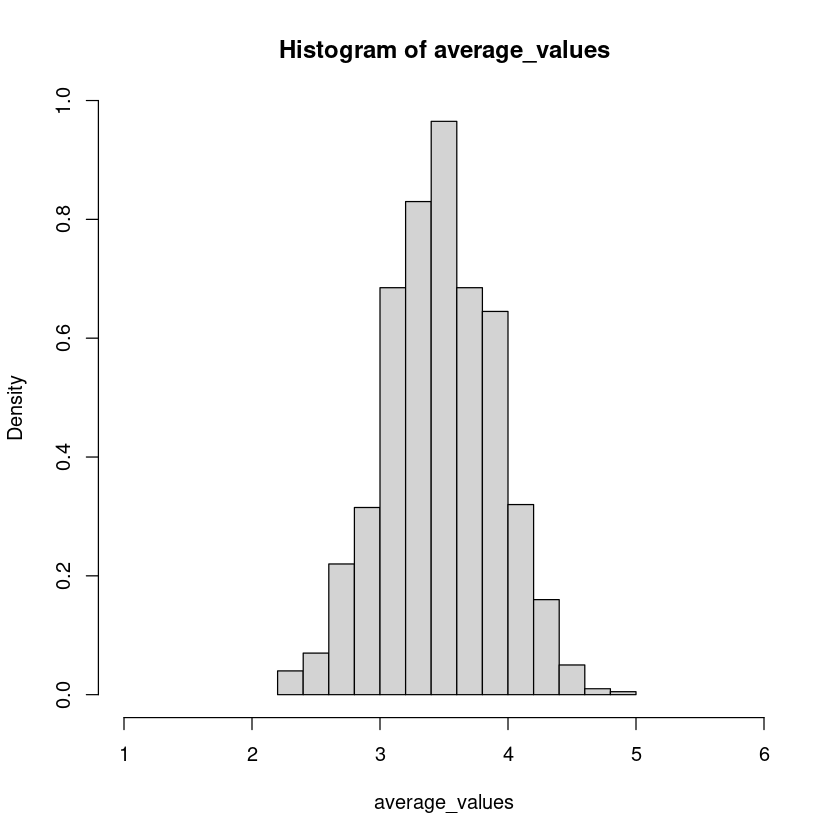

In [6]:
#Dice Rolling Average
mean_distribution = function(Sample_size){                 # Function to record mean values of samples                
    average_values=c()                                     # Vector to hold averagae values
    for (i in 1:1000){                                     # Take 1000 samples                                     
        faces=c(1,2,3,4,5,6)
        outcomes=(sample(faces, replace=TRUE, Sample_size))
        average_values=append(average_values, mean(outcomes)) # Compute average value for sample i
    }
    hist(average_values, freq=FALSE, xlim = c(1,6))                       # Draw distribution of mean values
}
mean_distribution(15)                                       # Call function with sample size=15

*Review*: As you increase and decrease the sample size by changing the number within mean_distribution(30) above, what do you notice about the sampling distribution?

The above distribution is centered around 3.5! The *sampling distribution*, the hypothetical distribution of sample means (average dice roll outcomes), is centered around the true population mean. This is guaranteed by the Central Limit Theorem, which states that:

1. Virtually regardless of the underlying distribution of population data (in the dice case a uniform distribution), the sampling distribution for the data will approximate a Normal distribution.  

2. The distribution of sample means will have an average equal to the population mean.

3. The standard deviation of the sample means, called the *standard error of the mean*, is equal to: $$\sigma_{\overline{Y}}=\frac{\sigma_Y}{\sqrt{n}}$$

## Statistical Inference

We have learned that the sampling distribution of the sample means has desirable properties when the sample size is sufficiently large. In empirical political science practice, however, we usually do not have the luxury of generating a sampling distribution. Rather, we have one random sample and need to use it to estimate the population mean. How do we know how close our sample mean is to the unknown population mean? The Central Limit Theorem allows us to provide an estimate of the amount of error there is in estimating the population mean.  

To do this let's use R to simulate a sample of 30 student grades from the many thousands of students who have taken PS3 over the years: 

In [7]:
class_size = 30                                                  # Sample size = 30
midterm_grade = sample(c(73:93), replace=TRUE, class_size)       # Generate sample of grades betw 73 and 93
head(midterm_grade)                                              # Display grades

[1] 93 88 78 85 83 83

First we need to compute the sample mean $$\overline{Y}=\frac{\sum_{i=1}^{n}Y_i}{n}$$ and standard deviation $$\sigma_Y=\sqrt{\frac{\sum_{i=1}^{n} (Y_i - \overline{Y})^2}{n-1}}$$ It is easy in R. 

In [8]:
sample_avg = mean(midterm_grade)
sample_avg

[1] 81.8

In [9]:
sample_std_dev = sd(midterm_grade)
sample_std_dev

[1] 5.677542

And now the standard error: $$\sigma_\overline{Y}=\frac{\sigma_Y}{\sqrt{n}}$$

In [10]:
std_err = sd(midterm_grade)/(length(midterm_grade))^0.5
std_err

[1] 1.036573

Next we need to recall that the distribution of the sample means is Normal (according to the Central Limit Theorem) *and* that 95% of the observations in a Normal distribution are within two standard deviations of the mean. Since the sample mean is our best guess of the population mean, we can conclude that the actual population mean is within two standard errors of the sample mean. We call this the *95% confidence interval*. The 95% confidence interval means that we are 95% confident that the true population mean lies within two standard errors of the sample mean. By the same logic, we can be 99% confident that the true population mean lies within three standard errors of the sample mean. 

Below, we can calculate the 95% confidence interval for the population midterm grade average.

95% confidence interval:  $$\overline{Y} \pm 2(\sigma_\overline{Y})$$


In [11]:
print(c("95% Confidence Interval:", sample_avg - 2*std_err, sample_avg + 2*std_err))

[1] "95% Confidence Interval:" "79.7268547965753"        
[3] "83.8731452034247"        


## Review

We've done a lot in this lecture:
1. Learned how to represent distributions of values, including the Normal distribution
2. Demonstrated the Central Limit Theorem and its use for statistical inference
3. Learned how to compute a 95% confidence interval around a sample mean

#### Reminder about Peer Consulting Office Hours

If you had trouble with any content in this notebook, Data Peer Consultants are here to help! You
can view their locations and availabilites at this link: https://data.berkeley.edu/degrees/peer-advising. Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world or other data science courses offered at Berkeley -- make sure to take advantage of this wonderful resource!